## Wordcloud of Top 75 Words in Star Trek: The Next Generation

### Before we begin 

Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-R.ipynb](textPrep-R.ipynb) before you proceed further. The textPrepPy notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED.

### Let's get started

First, we need to set our working directory (setwd). This is the folder that points to where your data is stored. In our case we have multiple folders that we may want to use at some point, but they are all contained in our Text-Analysis folder, so we will set that as our working directory.

In [3]:
setwd("~/Text-Analysis")

#### Include necessary packages for notebook 

R's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of R, others created by R users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In R Studio, packages can be installed by navigating to Tools in the menu bar > Install Packages. Or in the bottom right panel click on the "packages" tab and then click on "install."

- **wordcloud:** Plots wordclouds.
- **tm:** this package provides tools (functions) for performing various types of text mining. In this script, we will use tm to performing text cleaning in order to have uniform data for analysis. Check out [this link](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) for the documentation!</li>

In [4]:
library(wordcloud)
library(tm)

Loading required package: RColorBrewer
Loading required package: NLP


### Read in an entire directory

The "Corpus" function from tm reads in the directory and saves it as a Corpus object. Here we are reading in every episode of Star Trek: The Next Generation.

In [5]:
corpus <- VCorpus(DirSource("data/StarTrekNextGenClean/series"))

### Scan in a single text

If you wish to only look at a single file or text, this code uses R's "scan" function to read in the text and is then saved as a variable called "text_raw"

In [6]:
#text_raw<-scan("data/StarTrekNextGenClean/series/277.txt", what="character", sep="\n")

### Save the text as a Corpus object

The "Corpus" function from tm reads in the single vector we scanned in the previous step and saves it as a Corpus object just as it does when reading in an entire directory.

In [7]:
#Create a corpus 
#corpus <- VCorpus(VectorSource(text_raw))

### Clean the corpus

To clean the corpus in this example, we are using the tm package's built in tools to:
1. Lowercase all words so that "Lake" and "lake" are recognized as the same string.
2. Since we are working with Star Trek: The Next Generation, and Picard loves to quote Shakespeare, we can scan in a pre-made early modern stopword list by scaning the text in as a character object and note that you wish to separate the text by line ("\n"). For now, we have commented this line out.
3. Remove stopwords using tm's built in "SMART" stopwords list and any words that are not thematically relevant.
4. Remove punctuation as it is not germane to this analysis.
5. Strip out any whitespace between words to get rid of empty elements.

In [8]:
corpus <- tm_map(corpus, content_transformer(tolower))
#Add early modern stopwords
#myStopWords <- scan("data/earlyModernStopword.txt", what="character", sep="\n")
corpus <- tm_map(corpus, removeWords, c(stopwords("SMART"), "yes", "just", "good"))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, stripWhitespace)

Plot the wordcloud! There are a number of arguments you can customize: "random.order" is false so that words are plotted in order of decreasing frequency; "scale"" indicates the size of the words; "rot.per" lets you customize the proportion of words that are rotated 90 degrees; "max.words" controls how many words show up in the wordcloud; and we've used the library "RColorBrewer" to give us access to some predefined palettes. Note that if you change the palette, you need to tell the argument how many colors are in the new palette. 

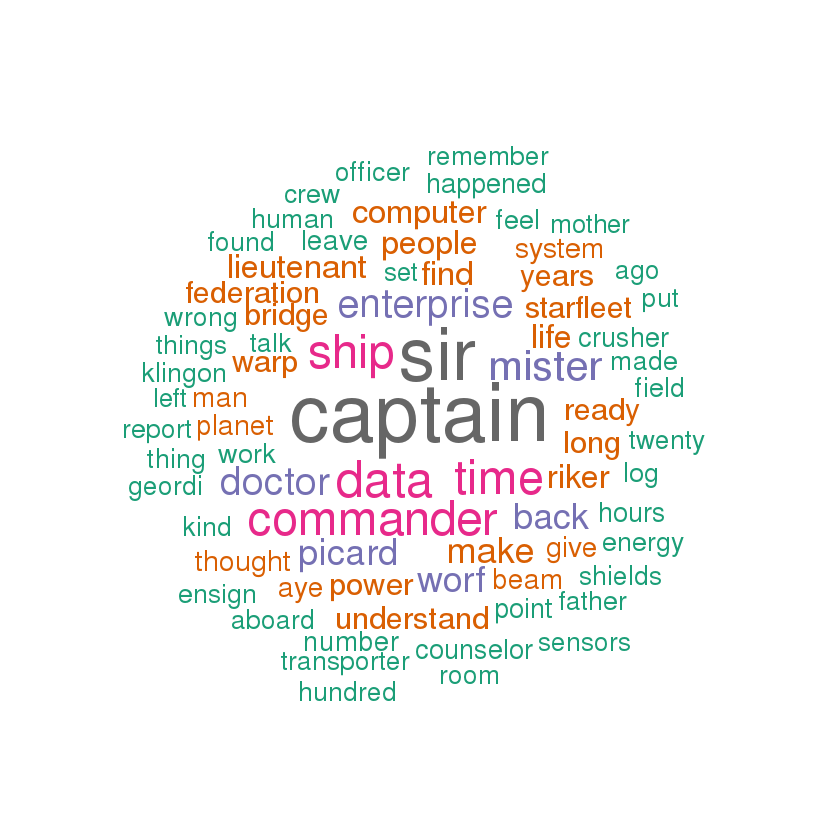

In [9]:
wordcloud(corpus,random.order=FALSE,scale=c(4,1),rot.per=0,
          max.words=75,colors=brewer.pal(8, "Dark2"))

### Voila!